In [1]:
# importing required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_curve, auc,
)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
# Data Collection
df = pd.read_csv("CGU_Dataset-6.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the dataset:-\n", df.head())

First 5 rows of the dataset:-
    id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  \
0   1          8            17          12                     1   
1   2          2             5           3                     1   
2   3         11             7           2                     0   
3   4          0             5           1                     0   
4   5          0             1           2                     0   

   LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0            11               30                      9                0.16   
1             0                8                      3                0.19   
2           117               12                      4                0.08   
3             0                8                      3                0.60   
4             2                0                      1                0.20   

   DECISION_COUNT  ...  NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0             

# Data Preprocessing

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  1988
No. of column in the dataset:  40


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 id                                   int64
LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                       int64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                    int64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
GLOBAL_DATA_COMPLEXITY               int64
GLOBAL_DATA_DENSITY                  int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST        

In [5]:
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
GLOBAL_DATA_COMPLEXITY             0
GLOBAL_DATA_DENSITY                0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_V

In [6]:
# Finding Unique categories of class column
print("Types of Class: ", df['CLASS'].unique())

Types of Class:  ['N' 'Y']


In [7]:
# Mapping with integer values
df['CLASS'] = df['CLASS'].map({'N': 0, 'Y': 1})
print("Checking Dataset after mapping:-\n", df.tail())

Checking Dataset after mapping:-
         id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  \
1983  1705         22             1          12                    12   
1984  1855          1            11           5                     2   
1985  1921          8             5           3                     4   
1986  1937         36            69          32                     5   
1987  1983         18            18           3                    14   

      LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  \
1983            88                0                      1   
1984             0               18                      6   
1985             3                8                      3   
1986            18              120                     38   
1987            27               16                      1   

      CYCLOMATIC_DENSITY  DECISION_COUNT  ...  NODE_COUNT  \
1983                0.05               0  ...          19   
1984                0.43        

In [8]:
# Split the dataset into independent and dependent feature
features = df.drop('CLASS', axis=1)
target = df.CLASS

In [9]:
# Checking for NaN values
features.columns[features.isna().any()]

Index([], dtype='object')

In [10]:
# Standardize the dataset using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [11]:
# Split the dataset into training and testing sets(70% training, 30%testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples \nTest set size: {X_test.shape[0]} samples')

Training set size: 1391 samples 
Test set size: 597 samples


# WITHOUT FEATURE DIMENSIONALITY REDUCTION

In [12]:
# Define models
models = {
    "Random Forest": ensemble.RandomForestClassifier(),
    "Adaboost": ensemble.AdaBoostClassifier(),
    "Adaboost Random Forest": ensemble.AdaBoostClassifier(estimator=ensemble.RandomForestClassifier(), random_state=42),
    "Adaboost SVM": ensemble.AdaBoostClassifier(estimator=SVC(probability=True, random_state=42)),
}

In [13]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0
    return specificity

In [14]:
# Results table without PCA
results_table = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

In [15]:
# Evaluate each model without PCA and populate the results table
for model_name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics to the results table
    results_table["Model"].append(model_name)
    results_table["Accuracy"].append(accuracy)
    results_table["Sensitivity"].append(sensitivity)
    results_table["Specificity"].append(specificity)
    results_table["Precision"].append(precision)
    results_table["F1 Score"].append(f1)
    results_table["MCC"].append(mcc)

# Create a DataFrame from the results table
df_results = pd.DataFrame(results_table)

# Display the table
print("Table1: Results without PCA:-")
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

Table1: Results without PCA:-

+------------------------+--------------------+---------------------+--------------------+--------------------+---------------------+---------------------+
|         Model          |      Accuracy      |     Sensitivity     |    Specificity     |     Precision      |      F1 Score       |         MCC         |
+------------------------+--------------------+---------------------+--------------------+--------------------+---------------------+---------------------+
|     Random Forest      | 0.9798994974874372 | 0.15384615384615385 | 0.9982876712328768 | 0.6666666666666666 |        0.25         | 0.31401474009298985 |
|        Adaboost        | 0.9765494137353434 | 0.15384615384615385 | 0.9948630136986302 |        0.4         | 0.2222222222222222  | 0.23816063889371786 |
| Adaboost Random Forest | 0.9782244556113903 | 0.15384615384615385 | 0.9965753424657534 |        0.5         | 0.23529411764705882 | 0.2691105115907777  |
|      Adaboost SVM      | 0.9782

In [16]:
# Find the index of the row with the highest accuracy
best_index = df_results["Accuracy"].idxmax()

# Extract the information about the best classifier
best_classifier_name = df_results.loc[best_index, "Model"]
best_classifier_accuracy = df_results.loc[best_index, "Accuracy"]

# Print conclusion
print(f"The best classifier is '{best_classifier_name}' with an accuracy of {best_classifier_accuracy:.2%}.")

The best classifier is 'Random Forest' with an accuracy of 97.99%.


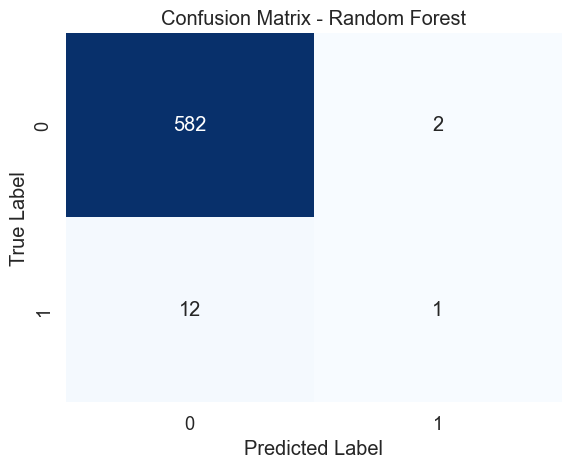

In [17]:
# Access the best classifier
best_classifier = models[best_classifier_name]

# Train the best classifier
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name}")
plt.show()

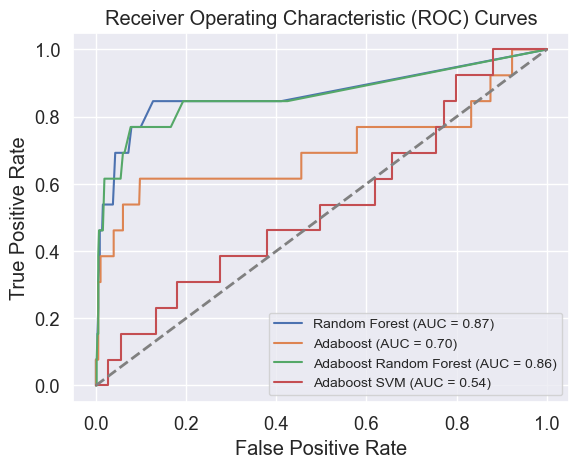

In [18]:
# Plot ROC curves for all models
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(fontsize='x-small')
plt.show()

# WITH FEATURE DIMENSIONALITY REDUCTION TECHNIQUE (PCA)

In [19]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

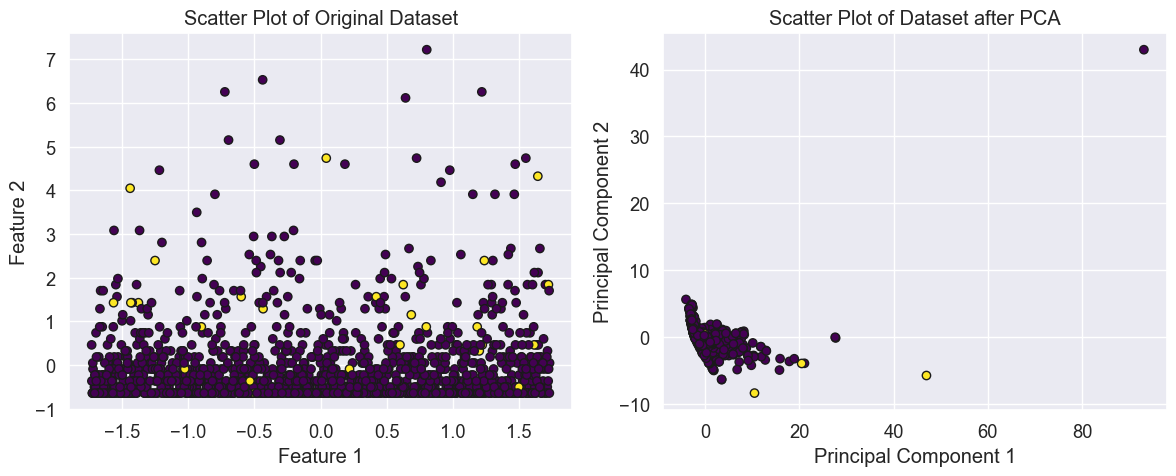

In [20]:
# Scatter plot for the original dataset and dataset after applying PCA
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for the original dataset
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[0].set_title('Scatter Plot of Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Scatter plot for the dataset after applying PCA
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[1].set_title('Scatter Plot of Dataset after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [21]:
# Create a table to store the results with PCA
results_table_pca = {
    "Model": [],  # Combined Model and PCA
    "Num Features": [],  # New column for Number of Features
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

In [22]:
# Evaluate each model with PCA and populate the results table
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred_pca = model.predict(X_test_pca)

    # Evaluate performance metrics
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    sensitivity_pca = recall_score(y_test, y_pred_pca)
    specificity_pca = specificity_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, zero_division=0)    # Handle zero division
    f1_pca = f1_score(y_test, y_pred_pca)
    mcc_pca = matthews_corrcoef(y_test, y_pred_pca)

    # Fill in the results table
    results_table_pca["Model"].append(f'PCA + {model_name}')
    results_table_pca["Num Features"].append(X_train_pca.shape[1])  # Number of PCA features
    results_table_pca["Accuracy"].append(accuracy_pca)
    results_table_pca["Sensitivity"].append(sensitivity_pca)
    results_table_pca["Specificity"].append(specificity_pca)
    results_table_pca["Precision"].append(precision_pca)
    results_table_pca["F1 Score"].append(f1_pca)
    results_table_pca["MCC"].append(mcc_pca)

# Create a DataFrame from the results table
df_results_pca = pd.DataFrame(results_table_pca)

# Display the table
print("Table2: Results with PCA:")
print(tabulate(df_results_pca, headers='keys', tablefmt='pretty', showindex=False))

Table2: Results with PCA:
+------------------------------+--------------+--------------------+---------------------+--------------------+-----------+---------------------+---------------------+
|            Model             | Num Features |      Accuracy      |     Sensitivity     |    Specificity     | Precision |      F1 Score       |         MCC         |
+------------------------------+--------------+--------------------+---------------------+--------------------+-----------+---------------------+---------------------+
|     PCA + Random Forest      |      15      | 0.9798994974874372 | 0.07692307692307693 |        1.0         |    1.0    | 0.14285714285714288 | 0.27454378546853103 |
|        PCA + Adaboost        |      15      | 0.9782244556113903 | 0.07692307692307693 | 0.9982876712328768 |    0.5    | 0.13333333333333336 | 0.18996978352617763 |
| PCA + Adaboost Random Forest |      15      | 0.9782244556113903 |         0.0         |        1.0         |    0.0    |         0.

In [23]:
# Find the index of the row with the highest accuracy with PCA
best_index_pca = df_results_pca["Accuracy"].idxmax()

# Extract the information about the best classifier with PCA
best_classifier_name_pca = df_results_pca.loc[best_index_pca, "Model"]
best_classifier_accuracy_pca = df_results_pca.loc[best_index_pca, "Accuracy"]

# Print conclusion with PCA
print(f"The best classifier with PCA is '{best_classifier_name_pca}' with an accuracy of {best_classifier_accuracy_pca:.2%}.")

The best classifier with PCA is 'PCA + Random Forest' with an accuracy of 97.99%.


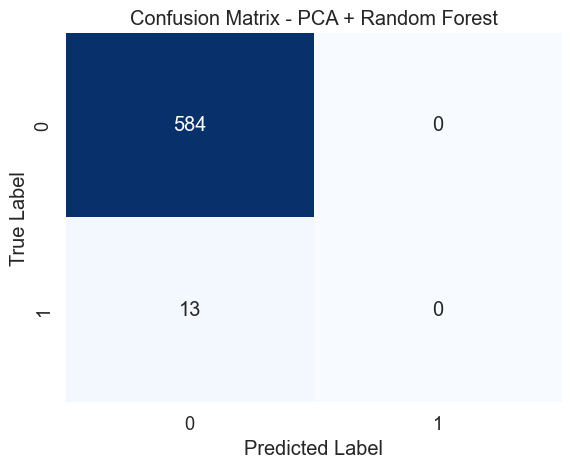

In [24]:
# Access the best classifier
best_classifier_pca = models[best_classifier_name_pca.split('PCA + ')[-1]]

# Train the best classifier
best_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = best_classifier_pca.predict(X_test_pca)

# Compute confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name_pca}")
plt.show()

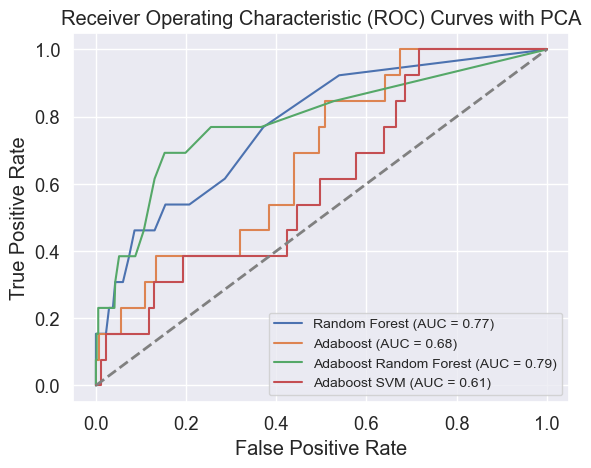

In [25]:
# Plot ROC curves for all models with PCA
for name, clf in models.items():
    clf.fit(X_train_pca, y_train)
    y_score_pca = clf.predict_proba(X_test_pca)[:, 1]
    fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca)
    roc_auc_pca = auc(fpr_pca, tpr_pca)
    plt.plot(fpr_pca, tpr_pca, label=f'{name} (AUC = {roc_auc_pca:.2f})')

# Plot the diagonal line for PCA
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with PCA')
plt.legend(fontsize='x-small')
plt.show()

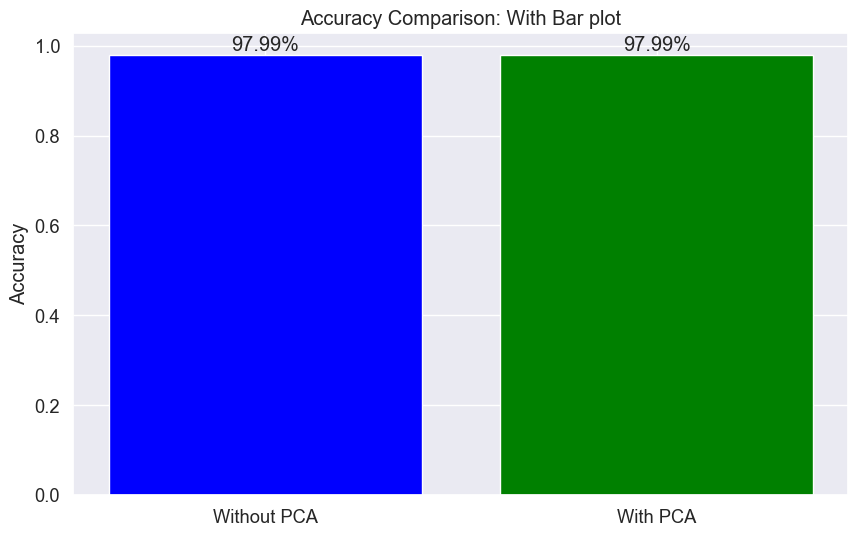

In [26]:
# Bar plot for accuracy comparison between the best model of each category
plt.figure(figsize=(10, 6))
bars = plt.bar(["Without PCA", "With PCA"], [best_classifier_accuracy, best_classifier_accuracy_pca], color=['blue', 'green'])

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval * 100, 2)}%", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: With Bar plot")
plt.show()

# Author information and copyright

# -*- coding: utf-8 -*-
@Author: Shankar Singh Mahanty
Type: Confidential [CGU Internal ML_Assignment5]
Copyright © 2023 C.V. Raman Global University. All Rights Reserved.